<a href="https://colab.research.google.com/github/shahriar0999/MachineLearingZoomCamp/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd

In [99]:
# read data
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

In [100]:
# few rows of dataset
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [101]:
# for this homework requirement i need to select those rows from car dataframe
columns = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']

print(columns)

['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']


In [102]:
car_df = df[columns]

## Data Preparation

In [103]:
# for this homework requirement i need to select those rows from car dataframe
columns = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']

car_df = df[columns]

In [104]:
# convert all columns names to lower case and, space convert to underscore
car_df.columns = car_df.columns.str.lower().str.replace(' ', '_')

In [105]:
# see how many missing values in this dataframe
car_df.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [106]:
# in engine_hp and engine_cylinders columns have missing value

# now fill those missing values with 0

# car_df.fillna(0, inplace=True)

car_df['engine_hp'] = car_df['engine_hp'].fillna(0)
car_df['engine_cylinders'] = car_df['engine_cylinders'].fillna(0)

<ipython-input-106-11cc8975c7ad>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df['engine_hp'] = car_df['engine_hp'].fillna(0)
<ipython-input-106-11cc8975c7ad>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df['engine_cylinders'] = car_df['engine_cylinders'].fillna(0)


In [107]:
# recheck to, see how many missing values in this dataframe
car_df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [108]:
# first we need to calculate average_price of cars
average_price = car_df['msrp'].mean()

In [109]:
# filter those value that are greater than average_price of car
above_average = car_df['msrp'] > average_price

In [110]:
# convert boolean to integer
above_average = above_average.astype(int)

In [111]:
# select numerical columns and categorica columns
numerical_cols = list(car_df.select_dtypes('number').columns.values)
categorical_cols = list(car_df.select_dtypes('object').columns.values)

# print both categorical_cols and num_cols
print(numerical_cols)
print(categorical_cols)

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'msrp']
['make', 'model', 'transmission_type', 'vehicle_style']


In [115]:
car_df.drop('msrp', axis=1, inplace=True)

<ipython-input-115-3aee8ffe35ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df.drop('msrp', axis=1, inplace=True)


In [116]:
# now split the data into train and test and validation
from sklearn.model_selection import train_test_split

X_full, X_test, y_full, y_test = train_test_split(car_df, above_average, test_size=.20, random_state=1)

In [117]:
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=.25, random_state=1)

In [118]:
# check shape of splited data

print('X_train Shape :',X_train.shape, y_train.shape)
print('X_val Shape :',X_val.shape, y_val.shape)
print('X_test Shape :',X_test.shape, y_test.shape)

X_train Shape : (7148, 9) (7148,)
X_val Shape : (2383, 9) (2383,)
X_test Shape : (2383, 9) (2383,)


# Question 1

In [119]:
# import roc_auc_score
from sklearn.metrics import roc_auc_score

# numerical for answer this question 1
numerical = ['engine_hp','engine_cylinders','highway_mpg','city_mpg']

print(numerical)

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']


In [120]:
#@ CALCULATING ROC AUC SCORE:
for c in numerical:
    auc = roc_auc_score(y_train, X_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -X_train[c])
    print('%9s, %.3f' % (c, auc))

engine_hp, 0.917
engine_cylinders, 0.766
highway_mpg, 0.633
 city_mpg, 0.673


In [121]:
# engine_hp has the height auc

# Question 2

In [122]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

In [123]:
X_train_dic = X_train.to_dict(orient='records')

In [124]:
X_train_dv = dv.fit_transform(X_train_dic)

In [125]:
from sklearn.linear_model import LogisticRegression
# now train the model
model_lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [126]:
model_lr.fit(X_train_dv, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [127]:
# now evaluate the model by using validation dataset
X_val_dic = X_val.to_dict(orient='records')

X_val_dv = dv.transform(X_val_dic)

In [128]:
# now prediction of X_val
y_val_pred = model_lr.predict(X_val_dv)

In [129]:
#@ INSPECTING ROC AUC SCORE:
print('ROC AUC Score ',round(roc_auc_score(y_val, y_val_pred),3))

ROC AUC Score  0.915


In [130]:
# after predict X_validation dataset, now we need to calculate AUC
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [131]:
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)
auc(fpr, tpr)

0.9150615600398313

In [132]:
roc_auc_score(y_val, y_val_pred)

0.9150615600398313

In [133]:
X_test_dict = X_test.to_dict(orient='records')
X_test_dv = dv.transform(X_test_dict)

In [134]:
y_test_pred = model_lr.predict(X_test_dv)

In [135]:
y_test

4257     1
11151    1
5262     0
8965     0
7380     0
        ..
3964     0
2854     1
7320     0
1620     1
7671     0
Name: msrp, Length: 2383, dtype: int64

# Question 3

In [136]:
import numpy as np

In [137]:
#@ creating confusion matrix:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.arange(0,1.01, 0.01)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    return df_scores


#@ IMPLEMENTATION OF FUNCTION:
df_scores = confusion_matrix_dataframe(y_val, y_val_pred)
df_scores[::-10]

,threshold,tp,fp,fn,tn
100,1.0,569,69,85,1660
90,0.9,569,69,85,1660
80,0.8,569,69,85,1660
70,0.7,569,69,85,1660
60,0.6,569,69,85,1660
50,0.5,569,69,85,1660
40,0.4,569,69,85,1660
30,0.3,569,69,85,1660
20,0.2,569,69,85,1660
10,0.1,569,69,85,1660


In [138]:
# adding the columns:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

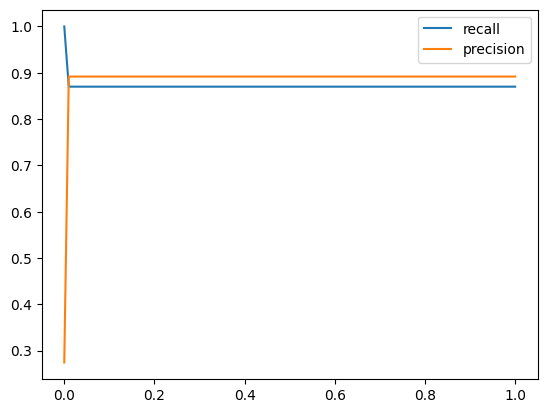

In [139]:
import matplotlib.pyplot as plt
# plot the chart
plt.plot(df_scores.threshold, df_scores.recall, label='recall')
plt.plot(df_scores.threshold, df_scores.precision, label='precision')


plt.legend()
plt.show()

# Question 4

In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1729
           1       0.89      0.87      0.88       654

    accuracy                           0.94      2383
   macro avg       0.92      0.92      0.92      2383
weighted avg       0.93      0.94      0.94      2383



In [143]:
# calculate F1 score:
df_scores['f1'] = (2 * df_scores.precision * df_scores.recall) / (df_scores.precision + df_scores.recall)

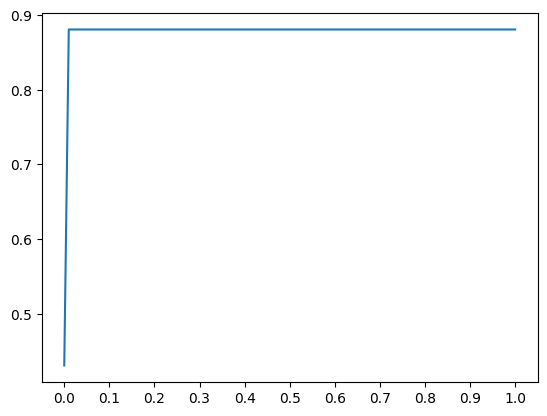

In [144]:
#@ INSPECTING F1 SCORE:
plt.plot(df_scores.threshold, df_scores.f1)
plt.xticks(np.linspace(0, 1, 11))
plt.show()

In [142]:
df_scores['f1']

0      0.430688
1      0.880805
2      0.880805
3      0.880805
4      0.880805
         ...   
96     0.880805
97     0.880805
98     0.880805
99     0.880805
100    0.880805
Name: f1, Length: 101, dtype: float64

# Question 5

In [148]:
from sklearn.model_selection import KFold

In [149]:
#@ DEFINING TRAIN AND PREDICT FUNCTION:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [150]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(X_full):
  X_train = X_full.iloc[train_idx]
  X_val = X_full.iloc[val_idx]

  y_train = y_full.iloc[train_idx]
  y_val = y_full.iloc[val_idx]

  from sklearn.feature_extraction import DictVectorizer
  from sklearn.linear_model import LogisticRegression
  dv = DictVectorizer(sparse=False)
  model_lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

  X_train_dict = X_train.to_dict(orient='records')
  X_train_dv = dv.fit_transform(X_train_dict)
  model_lr.fit(X_train_dv, y_train)

  X_val_dict = X_val.to_dict(orient='records')
  X_val_dv = dv.transform(X_val_dict)
  y_val_pred = model_lr.predict(X_val_dv)
  auc = roc_auc_score(y_val, y_val_pred)
  scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.912 +- 0.010


In [151]:
round(np.std(scores),3)

0.01

# Question 6

In [152]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for c in [0.01, 0.1, 0.5, 10]:
  scores = []
  for train_idx, val_idx in kfold.split(X_full):
    X_train = X_full.iloc[train_idx]
    X_val = X_full.iloc[val_idx]

    y_train = y_full.iloc[train_idx]
    y_val = y_full.iloc[val_idx]

    from sklearn.feature_extraction import DictVectorizer
    from sklearn.linear_model import LogisticRegression
    dv = DictVectorizer(sparse=False)
    model_lr = LogisticRegression(solver='liblinear', C=c, max_iter=1000)

    X_train_dict = X_train.to_dict(orient='records')
    X_train_dv = dv.fit_transform(X_train_dict)
    model_lr.fit(X_train_dv, y_train)

    X_val_dict = X_val.to_dict(orient='records')
    X_val_dv = dv.transform(X_val_dict)
    y_val_pred = model_lr.predict(X_val_dv)
    auc = roc_auc_score(y_val, y_val_pred)
    scores.append(auc)
  print((np.mean(scores), np.std(scores)))

(0.8431099193323386, 0.0035546295076263504)
(0.8880695589567156, 0.0069396271041935334)
(0.9027634172284117, 0.0026856789208598007)
(0.9189129337060947, 0.013903051069142266)
